In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [118]:
# The data is tab separated and the first column has the gene names
# Remember that most things in python are zero-indexed, so the first
# column is index 0
df = pd.read_csv('../Pabio536/C4C5_ Numpy_and_pandas/data/GSE88741-expression.txt', sep='\t', index_col=0)
df_sample = df.sample(100, axis = 0, random_state = 333)
meta = pd.read_excel("../Pabio536/C4C5_ Numpy_and_pandas/data/GSE88741-metadata.xlsx", index_col=1)
print (df_sample.head())
print (meta.head())

             GSM2344965  GSM2344966  GSM2344967  GSM2344968  GSM2344969  \
gene_symbol                                                               
ASPDH                 1           1           1           4           0   
KRT18P19              0           0           0           1           0   
ANKIB1             2578        2432        2067        2634        3238   
AGGF1P6               0           0           0           0           0   
ZNF618             1489        1441        1089         997        1088   

             GSM2344970  GSM2344971  GSM2344972  GSM2344973  GSM2344974  \
gene_symbol                                                               
ASPDH                 1           2           1           1           2   
KRT18P19              0           2           1           2           0   
ANKIB1             3158        2373        1908        2324        2918   
AGGF1P6               0           0           0           0           2   
ZNF618              994 

In [119]:
columns = meta.index
df_sample.columns = columns
print (df_sample.head())
print(df_sample.index)

Sample Title  FM_1  FM_2  FM_3  SK_MEL_28_1  SK_MEL_28_2  SK_MEL_28_3  \
gene_symbol                                                             
ASPDH            1     1     1            4            0            1   
KRT18P19         0     0     0            1            0            0   
ANKIB1        2578  2432  2067         2634         3238         3158   
AGGF1P6          0     0     0            0            0            0   
ZNF618        1489  1441  1089          997         1088          994   

Sample Title  SK_MEL_147_1  SK_MEL_147_2  SK_MEL_147_3  UACC_62_1  UACC_62_2  \
gene_symbol                                                                    
ASPDH                    2             1             1          2          1   
KRT18P19                 2             1             2          0          0   
ANKIB1                2373          1908          2324       2918       3352   
AGGF1P6                  0             0             0          2          2   
ZNF618  

In [23]:
#print(df_sample.index)
#print(df_sample.iloc[1,:5])
#print(df_sample.mean(1))
print(meta)
FMnorm = df_sample.iloc[:,0:3]
UACCmetastatic = df_sample.iloc[:,-3:]
print(FMnorm.head())
print(UACCmetastatic.head())

             Sample_geo_accession                Stage           cell type
Sample Title                                                              
FM_1                   GSM2344965  primary melanocytes  normal melanocytes
FM_2                   GSM2344966  primary melanocytes  normal melanocytes
FM_3                   GSM2344967  primary melanocytes  normal melanocytes
SK_MEL_28_1            GSM2344968           metastatic  melanoma cell line
SK_MEL_28_2            GSM2344969           metastatic  melanoma cell line
SK_MEL_28_3            GSM2344970           metastatic  melanoma cell line
SK_MEL_147_1           GSM2344971           metastatic  melanoma cell line
SK_MEL_147_2           GSM2344972           metastatic  melanoma cell line
SK_MEL_147_3           GSM2344973           metastatic  melanoma cell line
UACC_62_1              GSM2344974           metastatic  melanoma cell line
UACC_62_2              GSM2344975           metastatic  melanoma cell line
UACC_62_3              GS

In [41]:
FMmean = FMnorm.mean(1)
UACCmean = UACCmetastatic.mean(1)
MeanDiff = FMmean - UACCmean
maxDiffGene = MeanDiff.idxmax()
minDiffGene = MeanDiff.idxmin()
print(MeanDiff.sort_values())
print(maxDiffGene)

gene_symbol
BCAP31           -5739.666667
RCC2             -5082.666667
DYNLT3           -4202.000000
ZCCHC17          -1588.333333
RECQL4           -1434.666667
SHMT1            -1121.333333
LUM              -1102.666667
FOXC1            -1056.666667
DGKI             -1003.333333
ANKIB1            -797.666667
TAF1D             -699.333333
DTX3L             -533.666667
SLC26A6           -314.333333
TMEM60            -222.333333
CHRNA7            -213.666667
SULT1A1           -103.666667
NBAS               -91.666667
IQCG               -80.666667
NBPF17P            -27.000000
RPS6KA6            -14.666667
ZNF343             -14.000000
EHF                -14.000000
SYN1               -12.333333
AC010731.4         -11.666667
NCMAP               -6.666667
IMPG2               -6.000000
TRAPPC2B            -5.000000
AC104073.1          -4.666667
ASPDH               -2.666667
ZNF676              -2.000000
                     ...     
SRPK2P               1.333333
UBE3AP2              1.66666

In [61]:
print(FMnorm.loc[minDiffGene])
print(UACCmetastatic.loc[minDiffGene])

Sample Title
FM_1    4725
FM_2    5163
FM_3    5492
Name: BCAP31, dtype: int64
Sample Title
UACC_62_1     9605
UACC_62_2    12653
UACC_62_3    10341
Name: BCAP31, dtype: int64


### Relational Plots

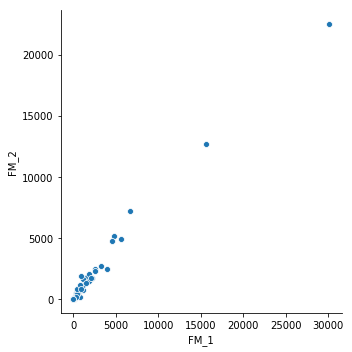

In [64]:
g = sns.relplot(x="FM_1", y="FM_2", data=FMnorm)
plt.show()

In [99]:
FM_UACC = pd.concat([FMnorm, UACCmetastatic], axis=1)
FM_UACC = FM_UACC.T
print(FM_UACC)

gene_symbol   ASPDH  KRT18P19  ANKIB1  AGGF1P6  ZNF618  IMPG2  SLC26A6  \
Sample Title                                                             
FM_1              1         0    2578        0    1489     13     1107   
FM_2              1         0    2432        0    1441      9      763   
FM_3              1         0    2067        0    1089     15     1508   
UACC_62_1         2         0    2918        2    1121     25     1405   
UACC_62_2         1         0    3352        2     978     15     1597   
UACC_62_3         8         2    3200        1    1184     15     1319   

gene_symbol   RP11-28P17.3  CYP51A1P2  UBE3AP2    ...     MOB3A  HNRNPA1P29  \
Sample Title                                      ...                         
FM_1                     0          2        1    ...      1488           0   
FM_2                     0          0        3    ...      1345           0   
FM_3                     2          5        1    ...      1383           0   
UACC_62_1   

In [103]:
indices = FM_UACC.index
tmp = indices.tolist()
metaFM_UACC = meta.loc[tmp]
FM_UACC['Stage'] = meta.loc[tmp,'Stage']
FM_UACC['SampleName'] = FM_UACC.index

In [120]:
dfT = df_sample.T
dfT['Stage'] = meta.Stage
dfT.head()

gene_symbol,ASPDH,KRT18P19,ANKIB1,AGGF1P6,ZNF618,IMPG2,SLC26A6,RP11-28P17.3,CYP51A1P2,UBE3AP2,...,HNRNPA1P29,KISS1,AEBP1,EHF,LUM,PLEKHM3,IQCG,AQP7P4,IGLV1-41,Stage
Sample Title,,,,,,,,,,,,,,,,,,,,,
FM_1,1,0,2578,0,1489,13,1107,0,2,1,...,0,0,15657,0,7,912,258,0,2,primary melanocytes
FM_2,1,0,2432,0,1441,9,763,0,0,3,...,0,0,12646,0,2,805,165,0,0,primary melanocytes
FM_3,1,0,2067,0,1089,15,1508,2,5,1,...,0,0,25078,1,1387,601,181,0,0,primary melanocytes
SK_MEL_28_1,4,1,2634,0,997,4,902,0,3,4,...,0,0,1,1,1694,598,117,0,0,metastatic
SK_MEL_28_2,0,0,3238,0,1088,2,1130,0,3,1,...,0,0,3,6,2178,646,163,0,0,metastatic


### Categorical Plots

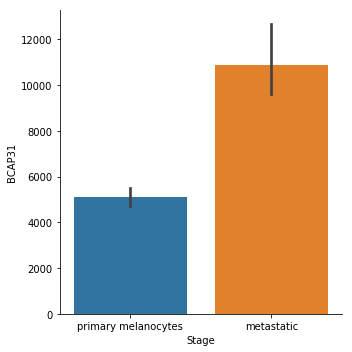

In [102]:
g = sns.catplot(x = 'Stage',y='BCAP31', data=FM_UACC, kind="bar")
plt.show()

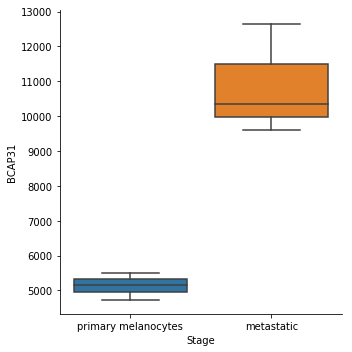

In [109]:
g = sns.catplot(x = 'Stage',y='BCAP31', data=FM_UACC, kind="box")
plt.show()

In [115]:
g = sns.catplot(x = 'Stage',y='BCAP31', data=df_sample, kind="box")
plt.show()

ValueError: Could not interpret input 'BCAP31'

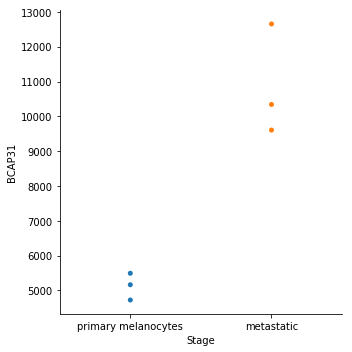

In [107]:
g = sns.catplot(x = 'Stage',y = 'BCAP31', data=FM_UACC, kind="swarm")
plt.show()

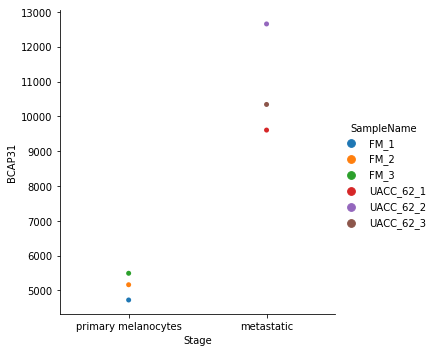

In [108]:
g = sns.catplot(x = 'Stage',y = 'BCAP31',hue = 'SampleName', data=FM_UACC, kind="swarm")
plt.show()

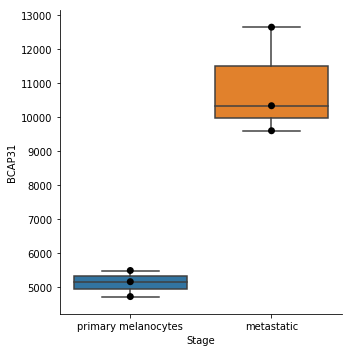

In [113]:
g = sns.catplot(x="Stage", y="BCAP31", kind="box", data=FM_UACC)
sns.swarmplot(x="Stage", y="BCAP31", color="k", size=7, data=FM_UACC, ax=g.ax);

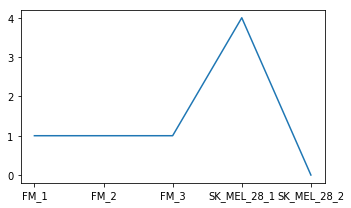

In [24]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(df_sample.iloc[0,:5])
#ax.set_title('Combined debt growth over time')
#ax.legend(loc='upper left')
#ax.set_ylabel('Total debt')
#ax.set_xlim(xmin=yrs[0],xmax=yrs[-1])
fig.tight_layout()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


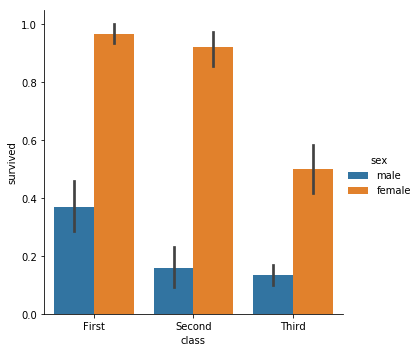

In [52]:
titanic = sns.load_dataset("titanic")
print(titanic.head())

g = sns.catplot("class", "survived", "sex", data=titanic, kind="bar", legend=True)
plt.show()

In [59]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
sns.relplot(x="total_bill", y="tip", data=tips)